# Fit the model usen Least square

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Prepare the data

Upload gradient data

In [2]:
data = pd.read_csv('files/transient_exp_data.csv')
print(data.shape)
print(data.head())

(21, 13)
   Time(s)  R1C1  R1C2  R1C3  R1C4  R2C1  R2C2  R2C3  R2C4  R3C1  R3C2  R3C3  \
0        0  17.3  16.4  18.1  18.2  14.4  14.6  15.8  18.8  17.0  15.9  15.6   
1      100  17.1  16.1  17.9  18.1  14.3  14.5  15.7  18.5  16.9  15.8  15.5   
2      200  16.9  16.2  17.4  17.8  14.2  14.4  15.4  18.1  16.7  15.6  15.2   
3      300  16.6  15.8  17.3  17.4  14.1  14.2  15.2  17.8  16.3  15.3  15.0   
4      400  16.3  15.6  17.1  17.1  13.9  14.0  14.9  17.1  16.1  15.1  14.8   

   R3C4  
0  16.5  
1  16.4  
2  16.0  
3  15.7  
4  15.6  


### Fill variables
- X refers to the independent values
- Y refers to the dependent values

In [3]:
x_label = 'Time(s)'
y_label = 'R1C1'

X = data[x_label].values
Y = data[y_label].values

### Build the model
Calculate coefficients for a 3th grade polynomial function

In [4]:
coefficents = np.polyfit(X, Y, 3)

Prepare the polynomial function

In [5]:
p = np.poly1d(coefficents)

###  Evaluate the model

In [6]:
# Calculating Root Mean Squares Error
rmse = 0
n = len(X)
for i in range(n):
    y_pred = p(X[i])
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)
print("RMSE")
print(rmse)

RMSE
0.05397575107245921


In [7]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Calculating R2 Score
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = p(X[i])
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print("R2 Score")
print(r2)

R2 Score
0.998475483730372


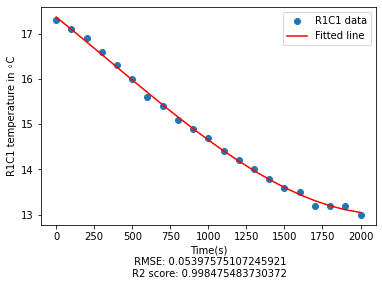

In [8]:
#plot
plt.plot(X, Y, 'o', label=y_label + ' data')
plt.plot(X, p(X), 'r', label='Fitted line')

plt.xlabel(x_label + "\n RMSE: " + str(rmse) + "\n R2 score: " + str(r2))
plt.ylabel(y_label + " temperature in ◦C")

plt.legend()
plt.show()

